# Flight Price Prediction ✈️ 💸

## Introduction

##### Accurately predicting flight ticket prices is a challenging yet crucial task for both airlines and customers. This notebook demonstrates the development of a machine learning model that predicts flight prices based on various factors, such as:

* **Airline:** The carrier operating the flight.
* **Flight Number:** The unique identifier for a flight.
* **Source and Destination Cities:** The cities where the flight begins and ends.
* **Departure and Arrival Times:** Time categories for the flight's start and end.
* **Number of Stops:** Direct flights or connecting flights.
* **Duration:** Total travel time.
* **Class:** Economy or Business class.
* **Days Left to Departure:** The number of days remaining before the flight.

##### The dataset used for this project contains over 30,000 rows of flight data, offering a comprehensive set of features to train the model. Through rigorous data preprocessing, feature engineering, and model evaluation, this project aims to provide a reliable prediction framework for flight prices

## 1. Data Loading 📂


### Loading the Dataset


In [1]:
import pandas as pd

# Use the raw file link
url = 'https://raw.githubusercontent.com/ChamodaHerath/Flight-Price-Prediction-Model/main/Clean_Dataset.csv'
df = pd.read_csv(url)




## 2. Data Exploration 🔍


In [2]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Distribution Visualization


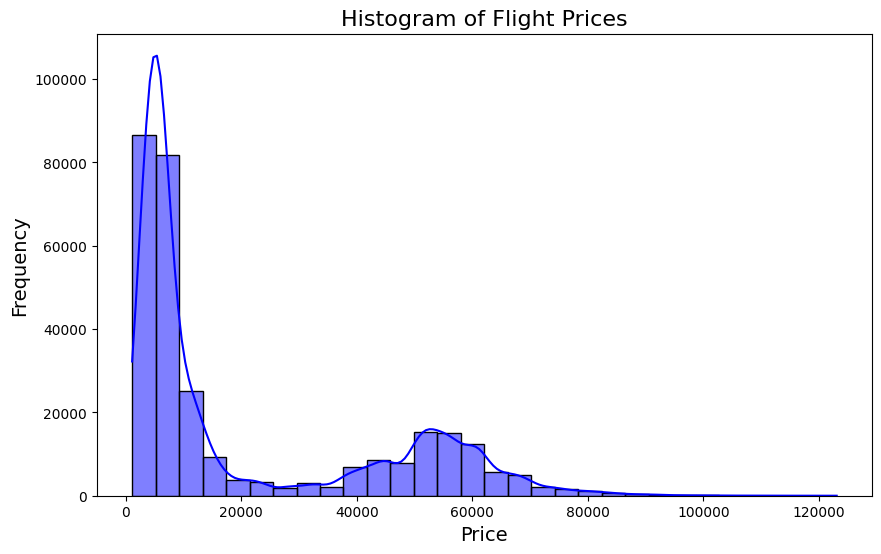

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='blue')

# Add labels and title
plt.title('Histogram of Flight Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()



In [22]:
import matplotlib.pyplot as pyplot
import numpy as np

def plot_bar_chart(df, column):
    value_counts = df[column].value_counts()
    colors = pyplot.get_cmap('tab10', len(value_counts))
    plt.figure(figsize=(6, 3))
    plt.bar(value_counts.index, value_counts.values, color=colors(np.arange(len(value_counts))))
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()



### Airline Details

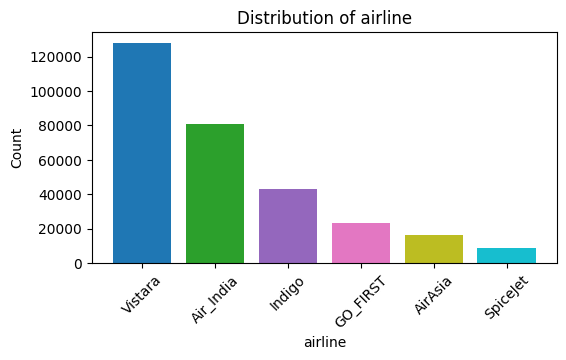

In [23]:
plot_bar_chart(df, 'airline')

In [24]:
df.airline.value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

### Source City Details

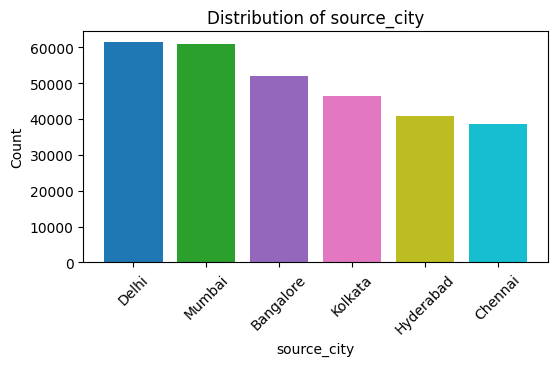

In [25]:
plot_bar_chart(df, 'source_city')

In [26]:
df.source_city.value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

### Destination City Details

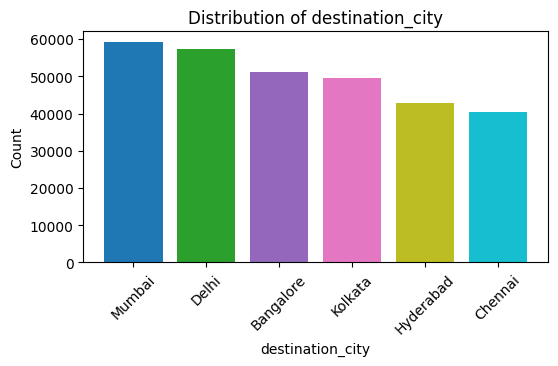

In [27]:
plot_bar_chart(df, 'destination_city')

In [28]:
df.destination_city.value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

### Departure Time Details

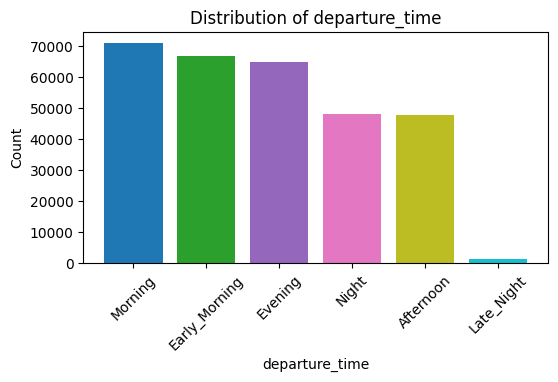

In [29]:
plot_bar_chart(df, 'departure_time')

In [30]:
df.departure_time.value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

### Arrival Time Details

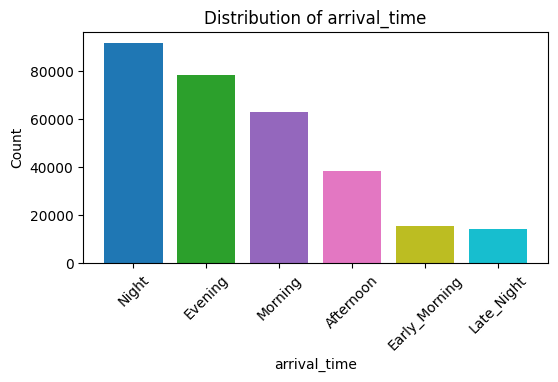

In [31]:
plot_bar_chart(df, 'arrival_time')

In [32]:
df.arrival_time.value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

### Stops Details

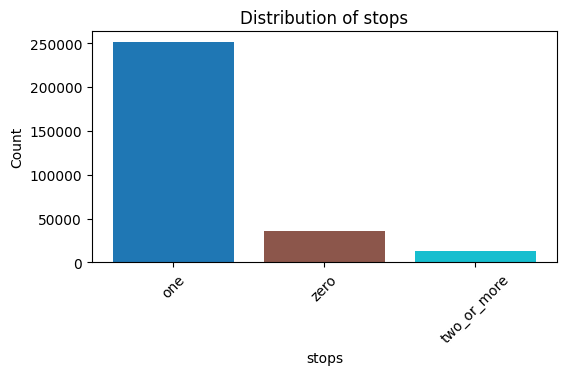

In [33]:
plot_bar_chart(df, 'stops')

In [34]:
df.stops.value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

### Class Details

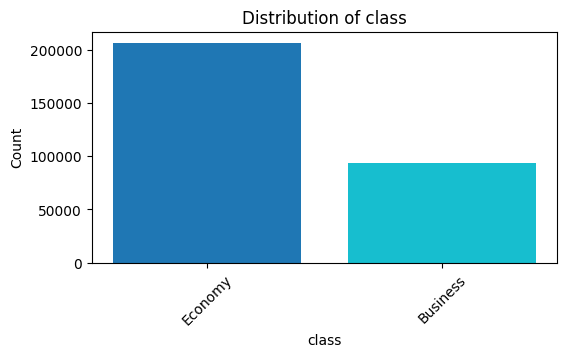

In [35]:
plot_bar_chart(df, 'class')

In [36]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

### Unique values for categorical columns

In [37]:

categorical_columns = ['airline','source_city','departure_time','stops','arrival_time','destination_city','class']
for column in categorical_columns:
    print(f"\nUnique values in {column}:")
    print(df[column].unique())


Unique values in airline:
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

Unique values in source_city:
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

Unique values in departure_time:
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

Unique values in stops:
['zero' 'one' 'two_or_more']

Unique values in arrival_time:
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

Unique values in destination_city:
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

Unique values in class:
['Economy' 'Business']


### Correlation between numerical columns

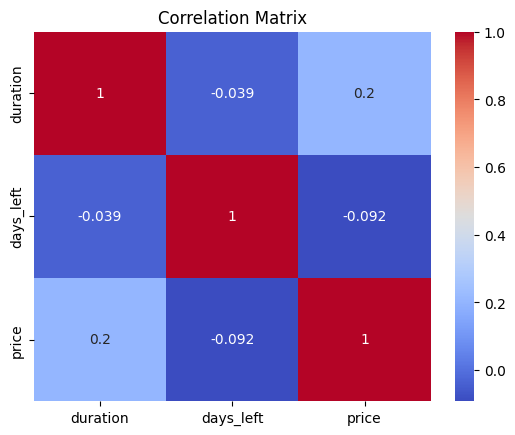

In [38]:
import seaborn as sns

numerical_columns = ['duration','days_left','price']
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 3. Data Preprocessing 🛠️


### Cleaning and Feature Selection


#### Dropping the unnecessary column

In [2]:
df = df.drop('Unnamed: 0', axis=1) ## this is row number
df = df.drop('flight', axis=1) ## i drop flight here bcz flight doesnt affect the prediction.

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

#### Handling Null Values

In [3]:
df = df.dropna()

In [4]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,1,10.00,49,81585


#### Encoding categorical columns by lable Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

binary_categorical_columns=['stops','class']
label_encoder = LabelEncoder()
for column in binary_categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    print(f"\nEncoded values for {column}:")
    print(df[column].unique())


Encoded values for stops:
[2 0 1]

Encoded values for class:
[0 1]


## 4. Feature Engineering ⚙️


In [6]:
import pandas as pd

#### One-hot encoding for categorical columns

In [7]:
df = pd.get_dummies(df, columns=['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'class'], drop_first=True)

In [8]:
df

,stops,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_1
0,2,2.17,1,5953,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,2,2.33,1,5953,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,2.17,1,5956,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2,2.25,1,5955,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2,2.33,1,5955,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,10.08,49,69265,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1
300149,0,10.42,49,77105,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
300150,0,13.83,49,79099,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
300151,0,10.00,49,81585,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1


#### Transform stops

#### Feature scaling for Numerical data

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['duration', 'days_left', 'price']] = scaler.fit_transform(df[['duration', 'days_left', 'price']])

#### Create interaction features

In [10]:
from sklearn.preprocessing import LabelEncoder

# Ensure the columns in source_cities and destination_cities are numeric
source_cities = [col for col in df.columns if col.startswith('source_city_')]
destination_cities = [col for col in df.columns if col.startswith('destination_city_')]

# Convert the columns to numeric if they are not already
df[source_cities] = df[source_cities].apply(pd.to_numeric, errors='coerce')
df[destination_cities] = df[destination_cities].apply(pd.to_numeric, errors='coerce')

# Identify the active city for source and destination
df['source_city_active'] = df[source_cities].idxmax(axis=1).str.replace('source_city_', '')
df['destination_city_active'] = df[destination_cities].idxmax(axis=1).str.replace('destination_city_', '')

# Create the 'route' column
df['route'] = df['source_city_active'] + ' to ' + df['destination_city_active']

# Create the 'price_per_hour' column
df['price_per_hour'] = df['price'] / df['duration']


# Apply LabelEncoder to categorical columns
for col in ['source_city_active', 'destination_city_active', 'route']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Display the new features
print(df[['source_city_active', 'destination_city_active', 'route', 'price_per_hour']].head())





   source_city_active  destination_city_active  route  price_per_hour
0                   1                        4      8        0.470879
1                   1                        4      8        0.478497
2                   1                        4      8        0.470785
3                   1                        4      8        0.474594
4                   1                        4      8        0.478432


## 5. Model Building and Training 🤖


In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

#### Feature-target split

In [12]:
X = df.drop(['price'], axis=1)  #feature
y = df['price'] #target

#### Train-test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

#### Print shape of training and testing data

In [15]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (240122, 33)
X_test shape: (60031, 33)
y_train shape: (240122,)
y_test shape: (60031,)


#### Define the models

In [16]:
rf_model = RandomForestRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)

#### Perform cross-validation

In [17]:
from sklearn.utils import shuffle

X_train_small, y_train_small = shuffle(X_train, y_train, random_state=42, n_samples=10000)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

#### Calculate mean and standard deviation of the cross-validation scores

In [18]:
print(f"Random Forest Mean CV Score: {-rf_cv_scores.mean():.4f} (Std: {rf_cv_scores.std():.4f})")
print(f"XGBoost Mean CV Score: {-xgb_cv_scores.mean():.4f} (Std: {xgb_cv_scores.std():.4f})")
print(f"Decision Tree Mean CV Score: {-dt_cv_scores.mean():.4f} (Std: {dt_cv_scores.std():.4f})")

Random Forest Mean CV Score: 0.0020 (Std: 0.0001)
XGBoost Mean CV Score: 0.0027 (Std: 0.0001)
Decision Tree Mean CV Score: 0.0036 (Std: 0.0002)


### Train and predict with **Random Forest**

In [19]:
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_score = rf_model.score(X_test, y_test)
print(f"Random Forest Test Score: {rf_score:.4f}")

Random Forest Test Score: 0.9981


### Train and predict with **XGBoost**

In [20]:
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

xgb_score = xgb_model.score(X_test, y_test)
print(f"XGBoost R² Score: {xgb_score:.4f}")

XGBoost Test Score: 0.9973


### Train and predict with **Decision Tree**

In [21]:
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

dt_score = dt_model.score(X_test, y_test)
print(f"Decision Tree R² Score: {dt_score:.4f}")

Decision Tree Test Score: 0.9968


#### Train and predict with CatBoost

In [22]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
catboost_model = CatBoostRegressor(random_state=42, verbose=0) 

# Train and evaluate CatBoost
catboost_model.fit(X_train, y_train)
catboost_predictions = catboost_model.predict(X_test)
catboost_score = r2_score(y_test, catboost_predictions)
print(f"CatBoost R² Score: {catboost_score:.4f}")

CatBoost R² Score: 0.9979


#### Train and predict with LightGBM

In [23]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

lightgbm_model = LGBMRegressor(random_state=42)
lightgbm_model.fit(X_train, y_train)
lightgbm_predictions = lightgbm_model.predict(X_test)
lightgbm_score = r2_score(y_test, lightgbm_predictions)
print(f"LightGBM R² Score: {lightgbm_score:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 646
[LightGBM] [Info] Number of data points in the train set: 240122, number of used features: 33
[LightGBM] [Info] Start training from score -0.000048
LightGBM R² Score: 0.9915


#### Compare the models based on their performance

In [24]:
models_scores = {
    'Random Forest': rf_score,
    'XGBoost': xgb_score,
    'Decision Tree': dt_score,
    'CatBoost' : catboost_score,
    'LightGBM' : lightgbm_score
}

best_model = max(models_scores, key=models_scores.get)
print(f"The most suitable model for this dataset is: {best_model}")

The most suitable model for this dataset is: Random Forest


## 6. Model Evaluation 📊


##### This accuracy indicates how well the independent variables (features) predict the dependent variable (target)

### Hyper parameter tuning

In [25]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

#### Define the hyperparameter grid

In [36]:
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': np.arange(2, 12, 2),
    'min_samples_leaf': np.arange(1, 6),
    'max_features': ['sqrt', 'log2', None, 0.5, 1.0],
    'bootstrap': [True, False]
}

#### Configure RandomizedSearchCV

In [37]:
rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

#### Fit RandomizedSearchCV

In [38]:
df_sampled = df.sample(n=1000, random_state=42)

In [39]:
x1 = df_sampled.drop(['price'], axis=1)  #feature
Y1 = df_sampled['price'] #target

x1_train, x1_test, Y1_train, Y1_test = train_test_split(x1, Y1, test_size=0.2, random_state=42)

In [40]:
rf_random.fit(x1_train, Y1_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': ['sqrt', 'log2', None,
                                                         0.5, 1.0],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   random_state=42, verbose=2)

#### Get the best parameters and the best score

In [44]:
print("\nBest Parameters:")
for param, value in rf_random.best_params_.items():
    print(f"{param}: {value}")
print(f"\nBest Cross-Validation Score: {rf_random.best_score_:.4f}")


Best Parameters:
n_estimators: 600
min_samples_split: 6
min_samples_leaf: 2
max_features: 0.5
max_depth: 80
bootstrap: False

Best Cross-Validation Score: 0.9581


#### Evaluate the best model on the test set

In [45]:
from sklearn.ensemble import RandomForestRegressor

best_rf_model = RandomForestRegressor(**rf_random.best_params_, random_state=42)
best_rf_model.fit(x1_train, Y1_train)


RandomForestRegressor(bootstrap=False, max_depth=80, max_features=0.5,
                      min_samples_leaf=2, min_samples_split=6, n_estimators=600,
                      random_state=42)

In [51]:
best_rf_score = best_rf_model.score(x1_test, Y1_test)
print(f" R² Score for Best Model: {best_rf_score:.4f}")

 R² Score for Best Model: 0.9649


#### Make prediction

In [46]:
train_predictions = best_rf_model.predict(x1_train)
test_predictions = best_rf_model.predict(x1_test)
print(train_predictions)

[-6.22876837e-01  1.82509177e+00 -7.13767602e-01 -8.07123589e-01
 -5.84881147e-01  1.54331945e+00 -3.84587968e-01  1.93869167e+00
 -6.16143651e-01 -6.50763436e-01  1.85989804e+00 -4.17816967e-01
 -4.13306064e-01  1.60691373e+00  1.59620872e+00 -5.73097622e-01
 -6.04776291e-01  1.75969275e+00 -7.74167428e-01 -6.55792780e-01
  4.73785303e-01 -6.00598851e-01  1.09539970e+00 -7.52021930e-01
  1.47251056e+00 -6.32851014e-01 -6.07297444e-01  2.00446482e+00
 -8.04879023e-01  1.62714620e+00 -5.13104427e-01  1.46301902e+00
 -6.91548468e-01  1.42774039e+00 -6.57487093e-01  1.59845791e+00
 -7.06103419e-01 -4.52185302e-01  1.08857352e+00 -8.43008888e-01
  1.75396210e+00 -6.90728616e-01 -6.56562082e-01 -5.98633909e-01
 -6.96006981e-01  1.50259867e+00 -6.63055660e-01 -2.55580111e-01
  1.79262039e+00 -6.34658357e-01 -6.84883183e-01 -6.19914306e-01
 -7.90032406e-01  2.09715894e+00 -7.62345812e-01 -6.36469578e-01
 -6.58233914e-01 -4.59761736e-01  1.48576597e+00 -7.01679059e-01
  5.52566852e-01 -7.31286

#### Calculate metrics for both training and test sets

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def print_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_name} Metrics:")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

#### Print metrics for both sets

In [48]:
print_metrics(Y1_train, train_predictions, "Training")
print_metrics(Y1_test, test_predictions, "Test")


Training Metrics:
Mean Absolute Error: 0.0335
Mean Squared Error: 0.0046
Root Mean Squared Error: 0.0677
R² Score: 0.9953

Test Metrics:
Mean Absolute Error: 0.1047
Mean Squared Error: 0.0363
Root Mean Squared Error: 0.1904
R² Score: 0.9649


#### Feature importance analysis

In [49]:
feature_importance = pd.DataFrame({
    'feature': x1_train.columns,
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))



Top 10 Most Important Features:
                    feature  importance
28                  class_1    0.748348
32           price_per_hour    0.081014
1                  duration    0.070054
7           airline_Vistara    0.039796
2                 days_left    0.013256
3         airline_Air_India    0.010561
0                     stops    0.009509
31                    route    0.004535
5            airline_Indigo    0.003734
30  destination_city_active    0.003558


#### Cross-validation scores for the best model

In [50]:
cv_scores = cross_val_score(best_rf_model, x1_train, Y1_train, cv=5, scoring='r2')
print("\nCross-validation scores:", cv_scores)
print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Cross-validation scores: [0.97008125 0.95024675 0.97129035 0.94917403 0.94987974]
Mean CV Score: 0.9581 (+/- 0.0205)


#### Create scatter plots for both training and test predictions

#### Training set scatter plot

NameError: name 'plt' is not defined

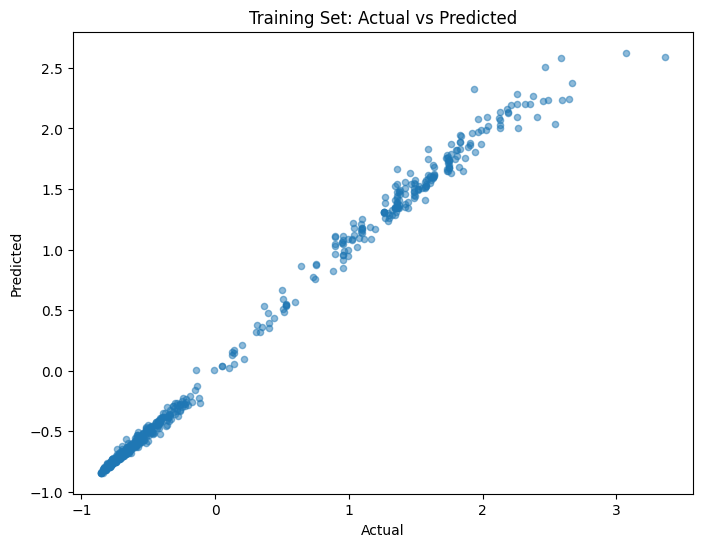

In [60]:
import pandas as pd


# Example data
data = pd.DataFrame({
    'Actual': Y1_train,
    'Predicted': train_predictions
})

# Scatter plot
data.plot.scatter(x='Actual', y='Predicted', alpha=0.5, figsize=(8, 6), title='Training Set: Actual vs Predicted')

# Adding a reference line (Actual = Predicted)
min_val = min(Y1_train.min(), train_predictions.min())
max_val = max(Y1_train.max(), train_predictions.max())
data['Line'] = data['Actual']  # Temporary column for the red line

data.plot(x='Line', y='Line', color='red', linestyle='--', linewidth=2, legend=False, ax=plt.gca())


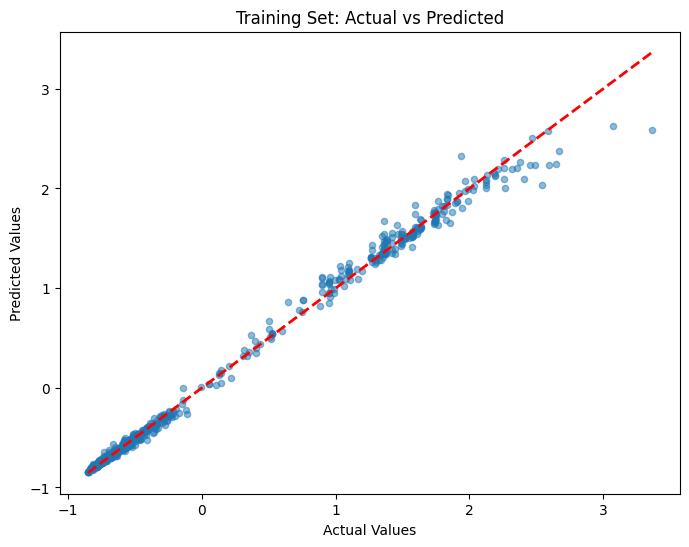

In [61]:
import pandas as pd

# Example DataFrame
data = pd.DataFrame({
    'Actual': Y1_train,
    'Predicted': train_predictions
})

# Plot 1: Scatter plot
ax = data.plot.scatter(x='Actual', y='Predicted', alpha=0.5, figsize=(8, 6), title='Training Set: Actual vs Predicted')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

# Plot 2: Add the reference line (Actual = Predicted)
min_val = min(data['Actual'].min(), data['Predicted'].min())
max_val = max(data['Actual'].max(), data['Predicted'].max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)


#### Test set scatter plot

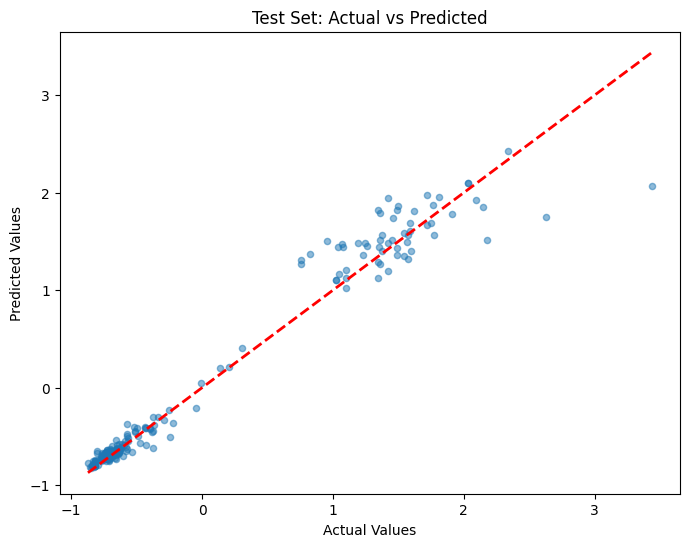

In [62]:
import pandas as pd

# Example DataFrame
test_data = pd.DataFrame({
    'Actual': Y1_test,
    'Predicted': test_predictions
})

# Scatter plot
ax = test_data.plot.scatter(x='Actual', y='Predicted', alpha=0.5, figsize=(8, 6), title='Test Set: Actual vs Predicted')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

# Add reference line (Actual = Predicted)
min_val = min(test_data['Actual'].min(), test_data['Predicted'].min())
max_val = max(test_data['Actual'].max(), test_data['Predicted'].max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)


#### Residual plot

#### Training residuals

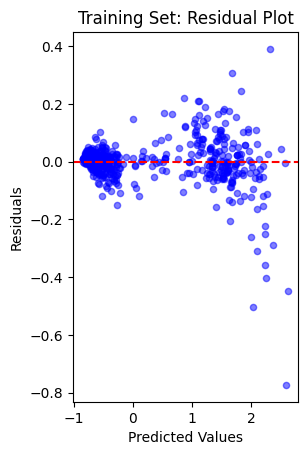

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming train_predictions and Y1_train are available as Pandas Series or DataFrames
residuals_train = train_predictions - Y1_train

# Create a DataFrame for easier handling
df_train = pd.DataFrame({'Predicted': train_predictions, 'Residuals': residuals_train})

# Create the plot using Pandas plot method
plt.subplot(1, 2, 1)
df_train.plot(kind='scatter', x='Predicted', y='Residuals', alpha=0.5, color='blue', ax=plt.gca())
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Training Set: Residual Plot')

plt.show()


##### Test residuals

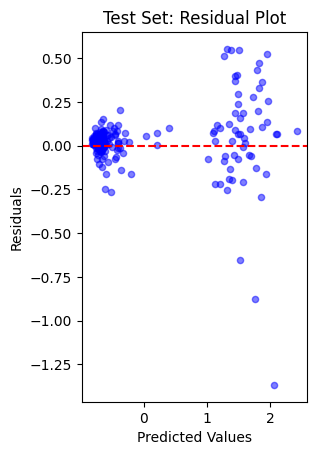

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming test_predictions and Y1_test are available as Pandas Series or DataFrames
residuals_test = test_predictions - Y1_test

# Create a DataFrame for easier handling
df_test = pd.DataFrame({'Predicted': test_predictions, 'Residuals': residuals_test})

# Create the plot for the test set using Pandas plot method
plt.subplot(1, 2, 2)
df_test.plot(kind='scatter', x='Predicted', y='Residuals', alpha=0.5, color='blue', ax=plt.gca())
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Test Set: Residual Plot')

plt.show()
